In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

from scipy.stats import rv_histogram

import nice
from nice.reload import deep_reload

In [27]:
graph = nice.graph.graph_from_json(
    '../supply_network_saturation/Data/Outputs/graph_nacs.json'
)

In [22]:
state = gpd.read_file('Data/Geometry/california.shp')
counties = gpd.read_file('Data/Geometry/california_counties.shp')

reduced_atlas = nice.graph.graph_from_json('Data/reduced_atlas.json')

places = nice.graph.graph_from_json(
    '../supply_network_saturation/Data/Outputs/places.json'
)

In [25]:
reduced_atlas.number_of_nodes()

7634

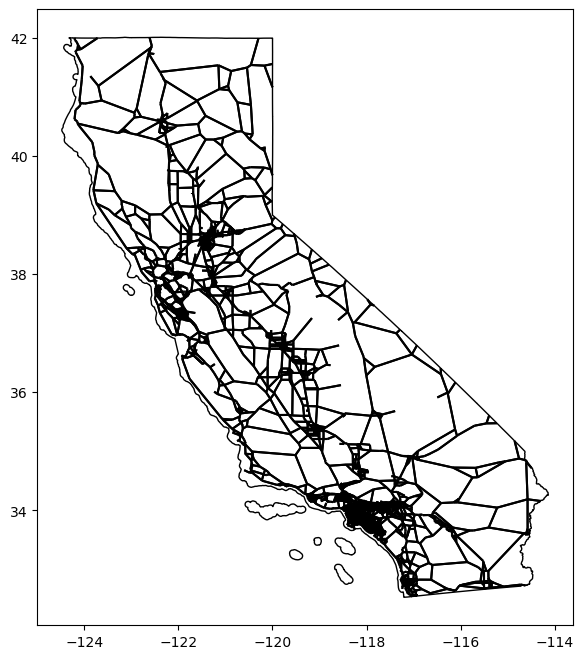

In [26]:
fig, ax = plt.subplots(figsize = (8, 8))

# counties.plot(ax = ax, fc = 'none', ec = 'b')
state.plot(ax = ax, fc = 'none', ec = 'k')

kw = {
    'plot': {
        'ec': 'k',
    },
}
    
_ = nice.plot.plot_edges(reduced_atlas, ax = ax, **kw)

kw = {
    'field': 'population',
    'plot': {
        'ec': 'b',
    },
    'colorbar': {}
}
    
# _ = nice.plot.plot_nodes(places, ax = ax, **kw)

In [4]:
'''
Creating a Vehicle
'''
deep_reload(nice)

kw = {
    'capacity': 75 * 3.6e6,
    'fields': ['ac_time', 'time', 'distance', 'energy']
}

vehicle = nice.optimization.Vehicle(**kw)

graph = vehicle.transform(atlas, places + stations)

In [28]:
places = [k for k, n in graph._node.items() if n['type'] == 'place']
stations = [k for k, n in graph._node.items() if n['type'] == 'station']

len(places), len(stations)

(468, 501)

In [29]:
deep_reload(nice)

paths = nice.optimization.get_paths(
    graph, terminals = places, k = 10, weight = 'time',
)

 [>           ] (4/467) 0.86%, 0.33 it/s, 15.24 s elapsed, 1408.39 s remainingUnexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/aaron/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_83754/2999070100.py", line 3, in <module>
    paths = nice.optimization.get_paths(
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aaron/Desktop/nice/nice/optimization/network.py", line 41, in get_paths
    ksp = k_shortest_paths(lg, origin, destination, k = k, weight = weight)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aaron/Desktop/nice/nice/graph/graph.py", line 391, in k_shortest_paths
    paths = list(islice(path_gen, k))
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aaron/anaconda3/lib/python3.12/site-packages/networkx/algorithms/simple_paths.py", line 529, in shortest_simple_paths
    length, spur = shortest_path_func(
                   ^^^^^^^^^^^^^^^^^^^
  File "/home/aaron/anaconda3/lib/pyth

In [7]:
# graph._adj['Davis, CA']

{'station_3': {'distance': 30940.0, 'time': 1101.892857142857},
 'station_10': {'distance': 620020.0, 'time': 20817.352147852143},
 'station_12': {'distance': 643120.0, 'time': 21669.51098901099},
 'station_15': {'distance': 174900.0, 'time': 6338.744605394608},
 'station_20': {'distance': 162270.0, 'time': 5911.052322677319},
 'station_23': {'distance': 172620.0, 'time': 6247.676073926075},
 'station_24': {'distance': 678880.0, 'time': 23065.701798201793},
 'station_29': {'distance': 216120.0, 'time': 7333.578671328672},
 'station_33': {'distance': 133040.0, 'time': 4817.210164835166},
 'station_56': {'distance': 615020.0, 'time': 20823.582917082906},
 'station_58': {'distance': 158500.0, 'time': 5377.481268731269},
 'station_65': {'distance': 733870.0, 'time': 24914.306693306695},
 'station_66': {'distance': 140900.0, 'time': 5323.784465534469},
 'station_73': {'distance': 81720.0, 'time': 3000.856643356643},
 'station_81': {'distance': 707670.0, 'time': 24175.030119880113},
 'statio